# Nice to Meat You: An Analysis on Meat Consumption

## Introduction

Meat consumption is a highly controversial topic in nowadays society in terms of [environment](https://www.theguardian.com/environment/2018/oct/10/huge-reduction-in-meat-eating-essential-to-avoid-climate-breakdown), [health](https://gamechangersmovie.com/), and [ethical](http://traslosmuros.com/en/slaughterhouse-documentary/) reasons. This situation introduces different ways of consuming meat and divides people according to their behaviors such as vegan, vegetarian, occasional meat consumer, and people consuming large amounts of meats.

In this project, we are particularly interested in the factors related to consuming meat and how the behavior of households varies according to their meat consumption. We are going to focus on demographic information such as economic status, family composition, age, and their relation with consuming meat. Moreover, we are going to study external effects that are related to meat consumption such as seasonal changes, campaigns, and discounts. Finally, we are going to categorize households according to their meat consumption and perform a behavior analysis per category.

To do so, we are going to use the Dunnhumby dataset. This dataset contains shopping information collected over two years from a group of 2,500 households as well as their information for each household. Moreover, we are planning to expand our analysis with an additional dataset about nutritional information.

## Table of Contents

## Environment Setup

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Analysis of Household Demographics

In [48]:
df_household = pd.read_csv('dunnhumby/hh_demographic.csv', sep = ',')
df_household.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [49]:
# correct dtypes
df_household['AGE_DESC'] = pd.Categorical(df_household['AGE_DESC'].values, categories=['19-24', '25-34', '35-44', '45-54', '55-64', '65+'], ordered=True)
df_household['MARITAL_STATUS_CODE'] = df_household['MARITAL_STATUS_CODE'].astype('category')
df_household['INCOME_DESC'] = pd.Categorical(df_household['INCOME_DESC'].values, \
    categories=['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K', '100-124K', '125-149K', '150-174K', '175-199K', '200-249K', '250K+'], \
    ordered=True)
df_household['HOMEOWNER_DESC'] =  df_household['HOMEOWNER_DESC'].astype('category')
df_household['HH_COMP_DESC'] = df_household['HH_COMP_DESC'].astype('category')
df_household['HOUSEHOLD_SIZE_DESC'] = pd.Categorical(df_household['HOUSEHOLD_SIZE_DESC'].values, categories=['1', '2', '3', '4', '5+'], ordered=True)
df_household['KID_CATEGORY_DESC'] = pd.Categorical(df_household['KID_CATEGORY_DESC'].values, categories=['None/Unknown', '1', '2', '3+'], ordered=True)
df_household.dtypes

AGE_DESC               category
MARITAL_STATUS_CODE    category
INCOME_DESC            category
HOMEOWNER_DESC         category
HH_COMP_DESC           category
HOUSEHOLD_SIZE_DESC    category
KID_CATEGORY_DESC      category
household_key             int64
dtype: object

### Exploratory Analysis

In [50]:
print('There are {0} rows and {1} columns in the dataset.'.format(len(df_household), len(df_household.columns))) 

There are 801 rows and 8 columns in the dataset.


In [51]:
print('Number of columns with missing values is {0}.'.format(len(df_household.columns.to_numpy()[df_household.isna().any()])))

Number of columns with missing values is 0.


In [52]:
print('Columns:')
print('--------')
for col in df_household.columns:
    print(col)

Columns:
--------
AGE_DESC
MARITAL_STATUS_CODE
INCOME_DESC
HOMEOWNER_DESC
HH_COMP_DESC
HOUSEHOLD_SIZE_DESC
KID_CATEGORY_DESC
household_key


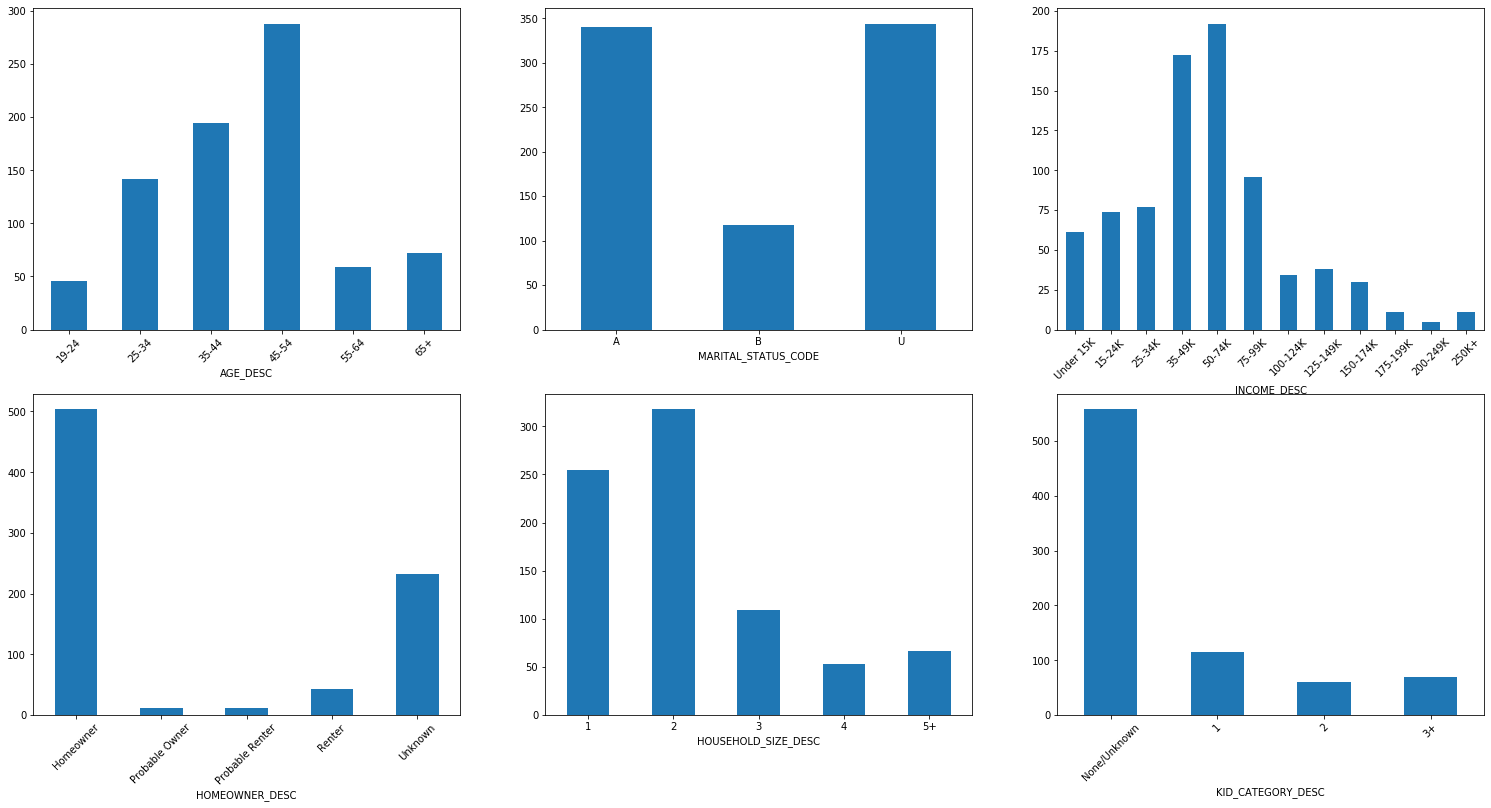

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(26,13))

for i, n in enumerate(['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC']):
    df_household.groupby(n)['household_key'].count().plot.bar(ax=axes[i // 3,i % 3])
    
    if i in [0, 2, 3, 5]:
        axes[i // 3,i % 3].set_xticklabels(axes[i // 3,i % 3].get_xticklabels(), rotation=45)
    else:
        axes[i // 3,i % 3].set_xticklabels(axes[i // 3,i % 3].get_xticklabels(), rotation=0)    

In [54]:
# merge some categories to have more households in them
cat_to_combine_over100K = ["100-124K", "125-149K", "150-174K", "175-199K", "200-249K", "250K+"]
cat_to_combine_under35K = ["Under 15K", "15-24K", "25-34K"]
def combine_cat(x):
    if x in cat_to_combine_over100K:
        return "100K+" 
    elif x in cat_to_combine_under35K:
        return "Under 35K"
    else: 
        return x
    
df_household['INCOME_DESC'] = df_household['INCOME_DESC'].apply(combine_cat)
df_household.INCOME_DESC.unique()

array(['35-49K', '50-74K', 'Under 35K', '75-99K', '100K+'], dtype=object)

In [55]:
df_household[df_household.INCOME_DESC == "Under 35K"]

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
2,25-34,U,Under 35K,Unknown,2 Adults Kids,3,1,8
5,65+,B,Under 35K,Homeowner,2 Adults No Kids,2,None/Unknown,17
7,35-44,B,Under 35K,Unknown,Single Female,1,None/Unknown,19
11,45-54,U,Under 35K,Probable Renter,Single Female,1,None/Unknown,27
14,45-54,U,Under 35K,Homeowner,2 Adults No Kids,2,None/Unknown,40
...,...,...,...,...,...,...,...,...
784,35-44,A,Under 35K,Homeowner,2 Adults No Kids,2,None/Unknown,2447
788,45-54,B,Under 35K,Homeowner,2 Adults No Kids,2,None/Unknown,2455
789,65+,A,Under 35K,Homeowner,Single Female,2,None/Unknown,2465
793,35-44,B,Under 35K,Unknown,Single Male,1,None/Unknown,2486


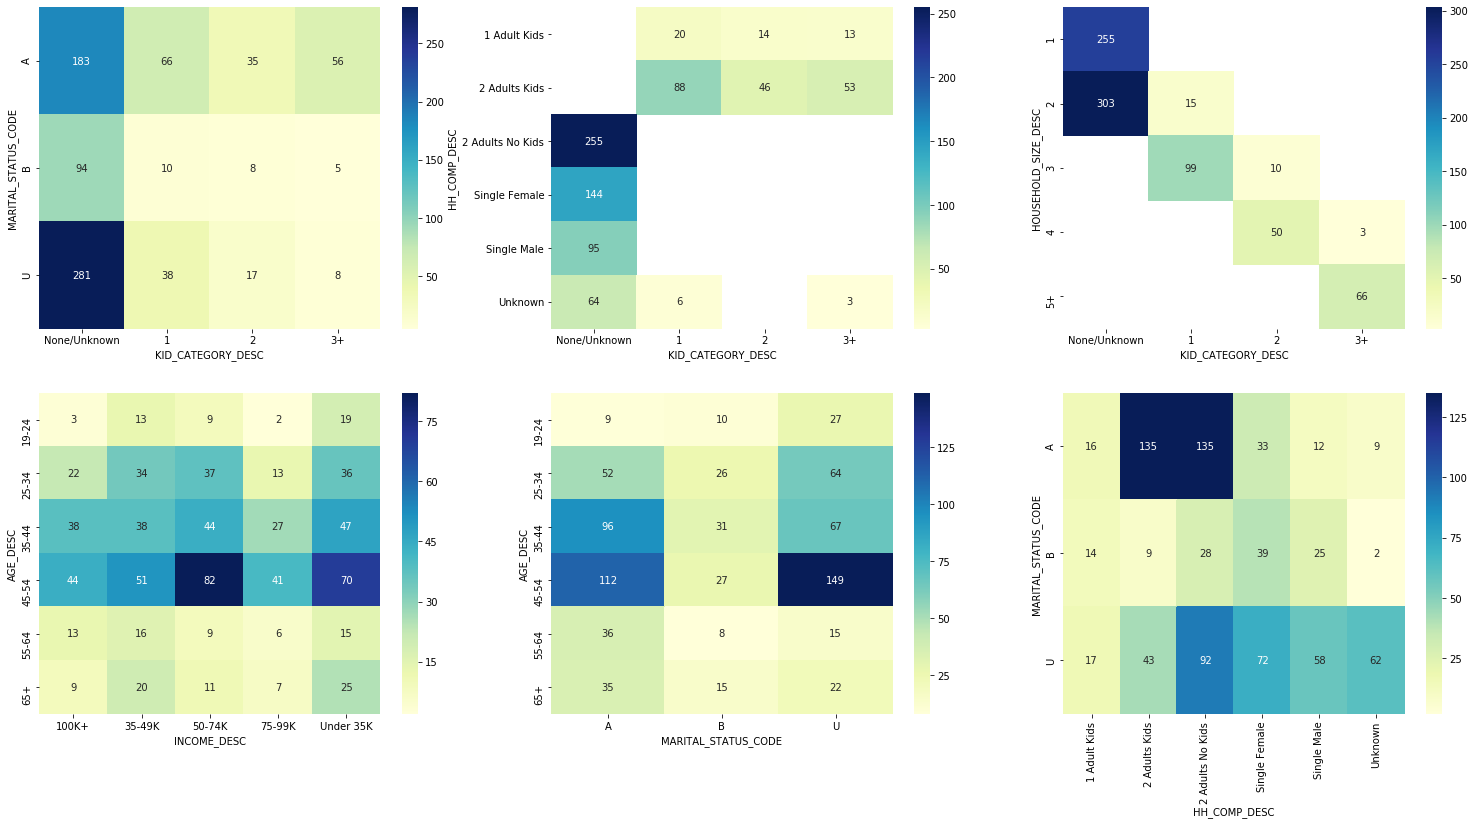

In [56]:
tuples = [ ('MARITAL_STATUS_CODE', 'KID_CATEGORY_DESC'),
 ('HH_COMP_DESC', 'KID_CATEGORY_DESC'),
 ('HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC'),
 ('AGE_DESC', 'INCOME_DESC'),
 ('AGE_DESC', 'MARITAL_STATUS_CODE'),
 ('MARITAL_STATUS_CODE', 'HH_COMP_DESC')]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(26,13))

for i, t in enumerate(tuples):
    df_dummy = df_household.groupby([t[0], t[1]]).count()\
        .reset_index().pivot(index= t[0], columns= t[1], values='household_key')
    
    sns.heatmap(df_dummy, annot=True, fmt=".0f", annot_kws={"size": 10}, cmap="YlGnBu", ax=axes[i // 3,i % 3])
    
    b, t = axes[i // 3,i % 3].set_ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    axes[i // 3,i % 3].set_ylim(b, t) # update the ylim(bottom, top) values

In [57]:
# add new usefull columns

# for gender column
def create_gender_column(row):
    if row['HH_COMP_DESC'] == 'Single Female':
        return 'Female'
    elif row['HH_COMP_DESC'] == 'Single Male':
        return 'Male'
    else:
        return None

# for faimly_info_exist column
def create_family_info_column(row):
    return not (row['HH_COMP_DESC'] == 'Unknown' and row['KID_CATEGORY_DESC'] == 'None/Unknown')

# create columns
df_household['GENDER'] = df_household.apply (lambda row: create_gender_column(row), axis=1)
df_household['FAMILY_INFO_EXIST'] = df_household.apply (lambda row: create_family_info_column(row), axis=1)

df_household.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,GENDER,FAMILY_INFO_EXIST
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,None,True
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,None,True
2,25-34,U,Under 35K,Unknown,2 Adults Kids,3,1,8,None,True
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13,None,True
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16,Female,True


## Analysis of Products

In [58]:
df_products = pd.read_csv('dunnhumby/product.csv', sep = ',')
df_products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [59]:
print('There are {0} rows and {1} columns in the dataset.'.format(len(df_products), len(df_products.columns))) 

There are 92353 rows and 7 columns in the dataset.


In [60]:
print('Number of columns with missing values is {0}.'.format(len(df_products.columns.to_numpy()[df_products.isna().any()])))

Number of columns with missing values is 0.


In [61]:
print('Columns:')
print('--------')
for col in df_products.columns:
    print(col)

Columns:
--------
PRODUCT_ID
MANUFACTURER
DEPARTMENT
BRAND
COMMODITY_DESC
SUB_COMMODITY_DESC
CURR_SIZE_OF_PRODUCT


In [62]:
print('There are {0} unique products distributed in {1} different departments.'.format(len(df_products['PRODUCT_ID'].unique()), len(df_products['DEPARTMENT'].unique())))

There are 92353 unique products distributed in 44 different departments.


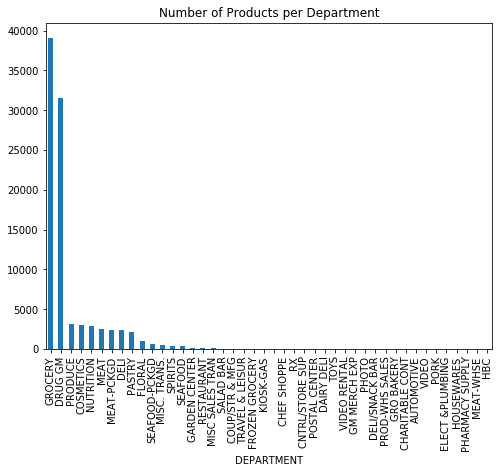

In [63]:
df_products.groupby("DEPARTMENT").count()["PRODUCT_ID"].sort_values(ascending=False).plot.bar(figsize=(8, 6))
plt.title('Number of Products per Department');

### Food Products

For this project, the main interest is food products. Therefore, a dataframe with only food-related departments is created.

In [64]:
df_food_products = pd.read_csv('data/food_products.csv')

In [65]:
print('There are {0} unique food products distributed in {1} different departments.'.format(len(df_food_products['PRODUCT_ID'].unique()), len(df_food_products['DEPARTMENT'].unique())))

There are 51341 unique food products distributed in 18 different departments.


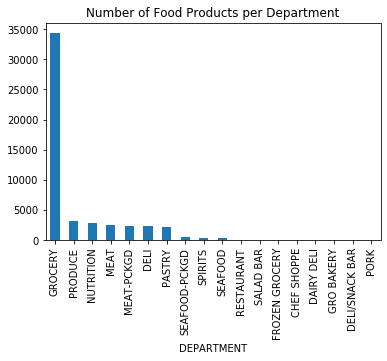

In [66]:
df_food_products.groupby("DEPARTMENT").count()["PRODUCT_ID"].sort_values(ascending=False).plot.bar()
plt.title('Number of Food Products per Department');

### Products Contain Only Meat

In [67]:
df_meat_products = pd.read_csv('data/meat_products.csv')

In [68]:
print('There are {0} unique food products distributed in {1} different departments.'.format(len(df_meat_products['PRODUCT_ID'].unique()), len(df_meat_products['DEPARTMENT'].unique())))

There are 8785 unique food products distributed in 10 different departments.


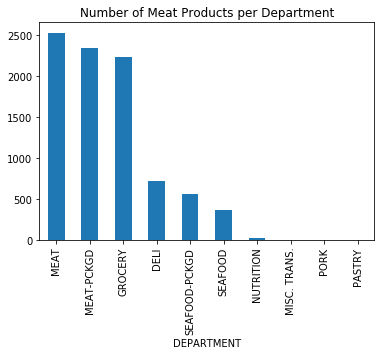

In [69]:
df_meat_products.groupby("DEPARTMENT").count()["PRODUCT_ID"].sort_values(ascending=False).plot.bar()
plt.title('Number of Meat Products per Department');

## Analysis of Transactions

In [70]:
df_transactions = pd.read_csv('dunnhumby/transaction_data.csv', sep = ',')
df_transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [71]:
print('There are {0} rows and {1} columns in the dataset.'.format(len(df_transactions), len(df_transactions.columns))) 

There are 2595732 rows and 12 columns in the dataset.


In [72]:
print('Number of columns with missing values is {0}.'.format(len(df_transactions.columns.to_numpy()[df_transactions.isna().any()])))

Number of columns with missing values is 0.


In [73]:
print('Columns:')
print('--------')
for col in df_transactions.columns:
    print(col)

Columns:
--------
household_key
BASKET_ID
DAY
PRODUCT_ID
QUANTITY
SALES_VALUE
STORE_ID
RETAIL_DISC
TRANS_TIME
WEEK_NO
COUPON_DISC
COUPON_MATCH_DISC


### Exploratory Analysis

The colum named SALES_VALUE does not represent what a client paid for a product. It represents the raw value of a product that does not take into account the potential discounts. To be able to analyse the expenses of the customers we want to create a column PAID_PRICE that contains the actual amount that the customer paid. 

The paid price is calculated as follows :

PAID_PRICE = (SALES_VALUE - ( |RETAIL_DISC| + |COUPON_MATCH_DISC|)) 

In [74]:
df_transactions["PAID_PRICE"] = (df_transactions.SALES_VALUE - (df_transactions.RETAIL_DISC.abs() + df_transactions.COUPON_MATCH_DISC.abs()))
df_transactions["PAID_PRICE"] = df_transactions["PAID_PRICE"].clip(lower=0)
df_transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,PAID_PRICE
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,0.79
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,0.82
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,0.69
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,1.21
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,1.11


In [75]:
print(f"Minimum value for the TRANS_TIME: {df_transactions.TRANS_TIME.min()}")
print(f"Maximum value for the TRANS_TIME: {df_transactions.TRANS_TIME.max()}")

Minimum value for the TRANS_TIME: 0
Maximum value for the TRANS_TIME: 2359


This column actually contains the time a which the transaction took place. The time is represented by an integer between 0 and 2359 that respectively corresponds to midnight and 23:59.  

We only keep the transactions related to food prodcuts n the rest of the analysis.

In [76]:
food_products_IDs = df_food_products.PRODUCT_ID.values
df_food_transactions = df_transactions[df_transactions.PRODUCT_ID.isin(food_products_IDs)]

In [77]:
print(f"The dataframe contains {len(df_food_transactions)} transactions.")

The dataframe contains 2130905 transactions.


In [78]:
print(f"The dataframe contains {len(df_food_transactions.BASKET_ID.unique())} baskets.")

The dataframe contains 225792 baskets.


### Basket Prices

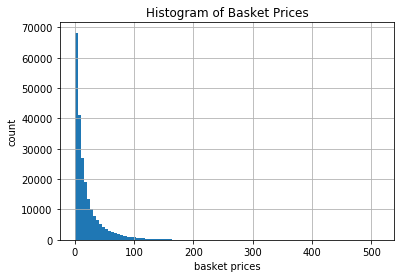

In [79]:
df_food_transactions.groupby("BASKET_ID").PAID_PRICE.sum().hist(bins=100)
plt.xlabel('basket prices')
plt.ylabel('count')
plt.title('Histogram of Basket Prices');

In [80]:
basket_prices = df_transactions.groupby("BASKET_ID").PAID_PRICE.sum()
print(f"The median basket price is {round(basket_prices.median(), 2)} $.")

The median basket price is 14.29 $.


It seems that the basket price follows a exponential distribution. We can plot it on a semi-log scale :

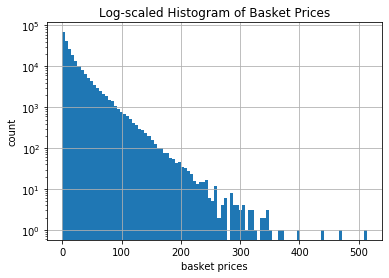

In [81]:
df_food_transactions.groupby("BASKET_ID").PAID_PRICE.sum().hist(bins=100)
plt.yscale("log")
plt.xlabel('basket prices')
plt.ylabel('count')
plt.title('Log-scaled Histogram of Basket Prices');

We see that there are some baskets that cost 0 dollars. Let's have a look at one of those baskets :

In [82]:
free_products = len(df_food_transactions[df_food_transactions.PAID_PRICE == 0])
percent_free_products = round(free_products * 100 / len(df_food_transactions), 2)
print(f"There are {free_products} products that were bought for free which is {percent_free_products}% of food related transcations.")

There are 73069 products that were bought for free which is 3.43% of food related transcations.


In [83]:
df_food_transactions[df_food_transactions.PAID_PRICE == 0].head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,PAID_PRICE
15,1364,26984896261,1,981760,1,0.60,31742,-0.79,1520,1,0.0,0.0,0.0
62,1060,26985040735,1,924804,1,1.19,315,-1.20,1251,1,0.0,0.0,0.0
70,1060,26985040735,1,992246,1,1.25,315,-1.34,1251,1,0.0,0.0,0.0
147,718,26985360571,1,913785,1,0.99,324,-1.00,1115,1,0.0,0.0,0.0
165,718,26985360571,1,981760,1,0.60,324,-0.79,1115,1,0.0,0.0,0.0


For those products, we observe that the discount is bigger than the sales value. This explains why some transactions do not cost anything to the buyer.

### Basket Sizes

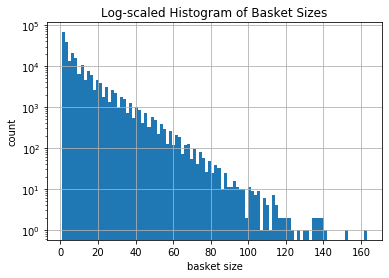

In [84]:
df_food_transactions.groupby("BASKET_ID").count()["PRODUCT_ID"].hist(bins=100)
plt.yscale("log")
plt.xlabel('basket size')
plt.ylabel('count')
plt.title('Log-scaled Histogram of Basket Sizes');

In [85]:
basket_size = df_food_transactions.groupby("BASKET_ID").count()["PRODUCT_ID"]
print(f"The median basket size is {int(basket_size.median())}.")

The median basket size is 5.


### Department-level Analysis

In [86]:
transac_prod = pd.merge(df_food_transactions, df_food_products, on="PRODUCT_ID", how="inner")[["PRODUCT_ID", "PAID_PRICE", "DEPARTMENT"]]

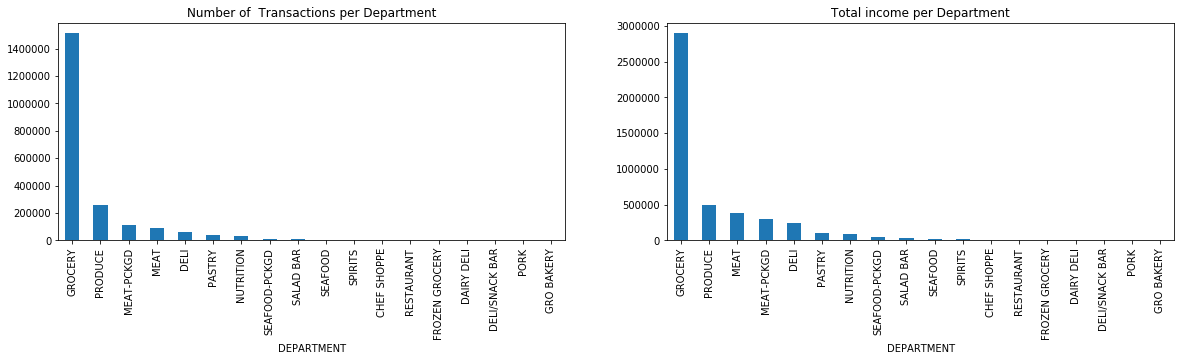

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
transac_prod.groupby("DEPARTMENT")["PAID_PRICE"].count().sort_values(ascending=False).plot.bar(title='Number of  Transactions per Department', ax = axes[0])
transac_prod.groupby("DEPARTMENT")["PAID_PRICE"].sum().sort_values(ascending=False).plot.bar(title='Total income per Department', ax = axes[1]);

### Most-profitable products

In [88]:
transac_prod = pd.merge(df_food_transactions, df_food_products, on="PRODUCT_ID", how="inner")
transac_prod.groupby(['PRODUCT_ID'], as_index=False)\
            .agg({'COMMODITY_DESC': 'first', 'SUB_COMMODITY_DESC': 'first', 'PAID_PRICE': 'sum'})\
            .sort_values(by="PAID_PRICE", ascending=False)\
            .head(10)

,PRODUCT_ID,COMMODITY_DESC,SUB_COMMODITY_DESC,PAID_PRICE
18459,1029743,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,38451.09
21857,1082185,TROPICAL FRUIT,BANANAS,27168.62
23420,1106523,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,26147.93
6374,844179,BEEF,PRIMAL,14574.54
19409,1044078,BEEF,LEAN,12970.96
24666,1126899,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,12652.43
16896,1005186,SALAD BAR,SALAD BAR FRESH FRUIT,12554.10
16220,995242,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,12020.87
21109,1070820,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,11645.41
24719,1127831,BERRIES,STRAWBERRIES,11353.37


### Analysis of Weekly spending per Household

In [90]:
# find active weeks  and total spendings per household
weeks_activity_by_household = df_food_transactions.groupby("household_key").agg({"WEEK_NO": set, "PAID_PRICE": sum})
# create new columns
weeks_activity_by_household["number_of_active_weeks"] = weeks_activity_by_household["WEEK_NO"].apply(lambda x: len(x))
weeks_activity_by_household["avg_spending_per_week"] = weeks_activity_by_household["PAID_PRICE"] / weeks_activity_by_household["number_of_active_weeks"]
# drop week_no and sort
weeks_activity_by_household = weeks_activity_by_household.drop(columns="WEEK_NO")
weeks_activity_by_household = weeks_activity_by_household.sort_values(by="number_of_active_weeks", ascending=False)

In [91]:
df_meat_transactions = pd.merge(df_meat_products, df_transactions, on="PRODUCT_ID", how="inner")

In [92]:
print(f"Number of transactions for meat : {len(df_meat_transactions)} which is {int(len(df_meat_transactions) * 100/len(df_food_transactions))}% of total transactions related to food.")

Number of transactions for meat : 341014 which is 16% of total transactions related to food.


In [93]:
total_spent_for_meat = df_meat_transactions.PAID_PRICE.sum()
total_spent = df_food_transactions.PAID_PRICE.sum()
print(f"Percentage of money spent for meat: {round(((total_spent_for_meat / total_spent) * 100), 2)}%")

Percentage of money spent for meat: 23.3%


In [94]:
# compute total spending for meat per household
spent_for_meat_by_household = df_meat_transactions.groupby("household_key").agg({"PAID_PRICE": sum}).reset_index()
# compute totatl spending for food per househould
spent_by_household = df_food_transactions.groupby("household_key").PAID_PRICE.sum()

# calculate avg. meat spending, avg food spending and the ratio of meat over food spending per week
spent_by_household = pd.merge(spent_for_meat_by_household, weeks_activity_by_household, on="household_key")
spent_by_household = spent_by_household.rename(columns={"PAID_PRICE_x": "paid_meat", "PAID_PRICE_y": "paid_food"})
spent_by_household["avg_spending_meat_per_week"] = spent_by_household.paid_meat / spent_by_household.number_of_active_weeks
spent_by_household["ratio_spent_for_meat"] = spent_by_household.avg_spending_meat_per_week / spent_by_household.avg_spending_per_week

In [95]:
spent_by_household.head()

,household_key,paid_meat,paid_food,number_of_active_weeks,avg_spending_per_week,avg_spending_meat_per_week,ratio_spent_for_meat
0,1,380.95,2812.21,67,41.973284,5.685821,0.135463
1,2,225.75,1082.74,31,34.927097,7.282258,0.208499
2,3,567.90,1711.78,36,47.549444,15.775000,0.331760
3,4,177.87,679.48,25,27.179200,7.114800,0.261774
4,5,126.35,429.39,24,17.891250,5.264583,0.294255


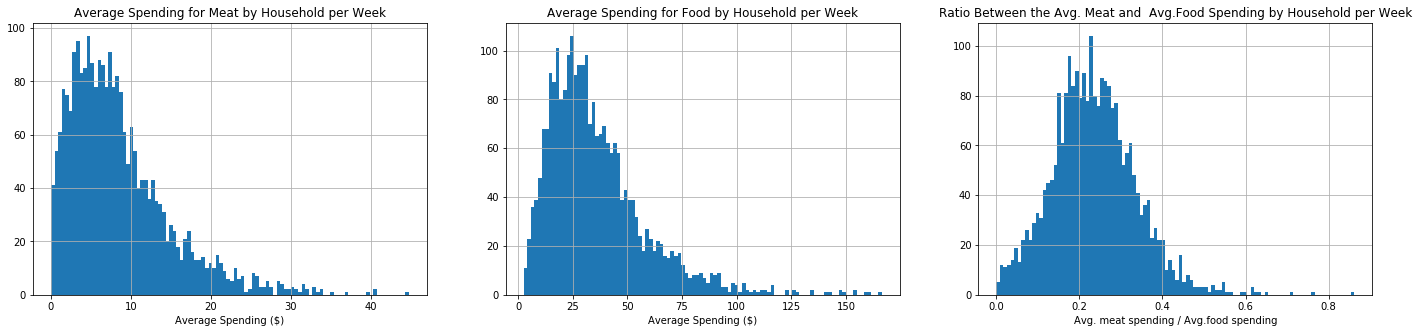

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
spent_by_household.avg_spending_meat_per_week.hist(bins=100, ax=axes[0])
spent_by_household.avg_spending_per_week.hist(bins=100, ax=axes[1])
spent_by_household.ratio_spent_for_meat.hist(bins=100, ax=axes[2])

axes[0].set_title("Average Spending for Meat by Household per Week")
axes[1].set_title("Average Spending for Food by Household per Week")
axes[2].set_title("Ratio Between the Avg. Meat and  Avg.Food Spending by Household per Week")
for ax in axes[0:2]: 
    ax.set_xlabel("Average Spending ($)")
axes[2].set_xlabel("Avg. meat spending / Avg.food spending")
plt.show()

In [98]:
print (f"Max spent for meat per household by week : {round(max(spent_by_household.avg_spending_meat_per_week), 2)}$")
print (f"Mean spent for meat per household by week : {round(np.mean(spent_by_household.avg_spending_meat_per_week), 2)}$")
print (f"Median spent for meat per household by week : {round(np.median(spent_by_household.avg_spending_meat_per_week), 2)}$")
print (f"Mean Ratio Between the Avg. Meat and  Avg.Food Spending by Household per Week: {round(np.mean(spent_by_household.ratio_spent_for_meat), 2)}")

Max spent for meat per household by week : 44.79$
Mean spent for meat per household by week : 8.48$
Median spent for meat per household by week : 7.14$
Mean Ratio Between the Avg. Meat and  Avg.Food Spending by Household per Week: 0.23


## Analysis of Coupons

In [99]:
df_coupon = pd.read_csv('dunnhumby/coupon.csv', sep = ',')
df_coupon.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [100]:
df_coupon_redempt = pd.read_csv('dunnhumby/coupon_redempt.csv', sep = ',')
df_coupon_redempt.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [101]:
print('There are {0} rows and {1} columns in the df_coupon.'.format(len(df_coupon), len(df_coupon.columns)))
print('There are {0} rows and {1} columns in the df_coupon_redempt.'.format(len(df_coupon_redempt), len(df_coupon_redempt.columns)))
print('Number of columns with missing values for df_coupon is {0}.'.format(len(df_coupon.columns.to_numpy()[df_coupon.isna().any()])))
print('Number of columns with missing values for df_coupon_redempt is {0}.'.format(len(df_coupon_redempt.columns.to_numpy()[df_coupon_redempt.isna().any()])))

There are 124548 rows and 3 columns in the df_coupon.
There are 2318 rows and 4 columns in the df_coupon_redempt.
Number of columns with missing values for df_coupon is 0.
Number of columns with missing values for df_coupon_redempt is 0.


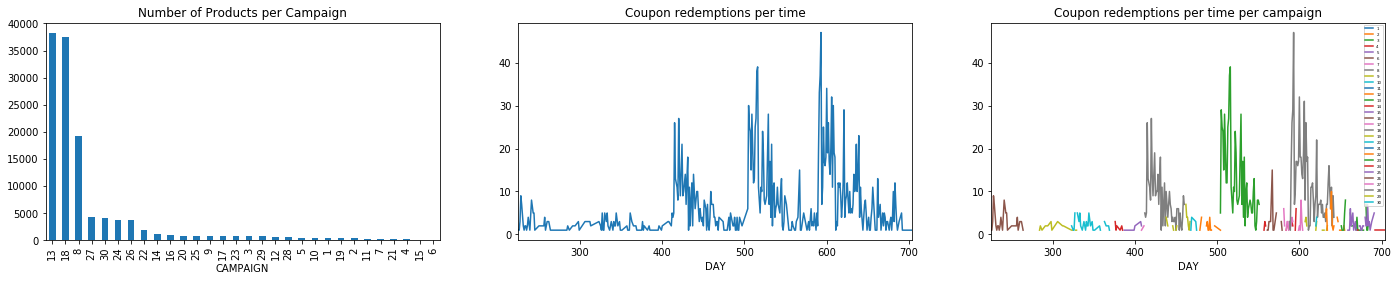

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,4))
df_coupon.groupby('CAMPAIGN')['COUPON_UPC'].count().sort_values(ascending=False).plot.bar(ax=axes[0])
axes[0].set_title("Number of Products per Campaign")

df_coupon_redempt.groupby('DAY')['household_key'].count().plot(ax=axes[1])
axes[1].set_title("Coupon redemptions per time")
df_coupon_redempt.groupby(['CAMPAIGN', 'DAY'])['household_key'].count().reset_index().pivot('DAY', 'CAMPAIGN', 'household_key').plot(ax=axes[2])
axes[2].set_title("Coupon redemptions per time per campaign")
plt.legend(prop={'size': 4});

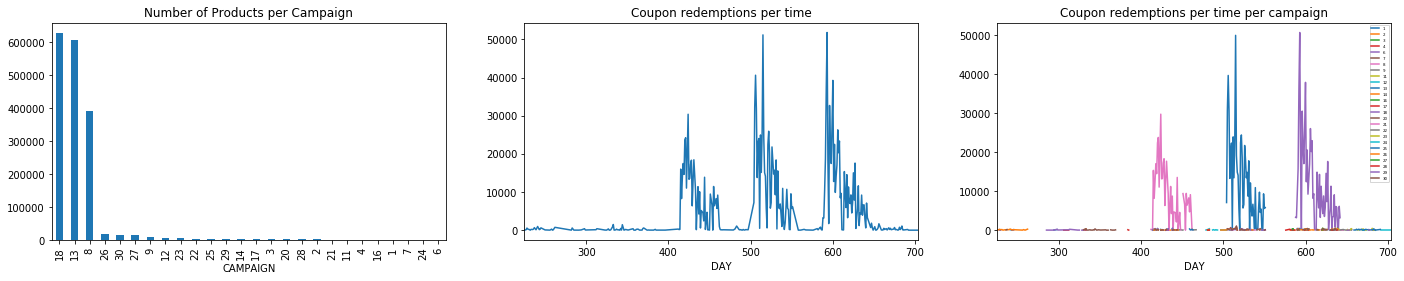

In [103]:
# merge coupon dataframes and filter by food products
df_coupon_and_redempt = pd.merge(df_coupon, df_coupon_redempt, on='COUPON_UPC')
df_coupon_and_redempt_for_food = df_coupon_and_redempt[df_coupon_and_redempt.PRODUCT_ID.isin(df_food_products.PRODUCT_ID)]\
    .drop('CAMPAIGN_y', axis=1).rename(columns={'CAMPAIGN_x': 'CAMPAIGN'})

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,4))
df_coupon_and_redempt_for_food.groupby('CAMPAIGN')['COUPON_UPC'].count().sort_values(ascending=False).plot.bar(ax=axes[0])
axes[0].set_title("Number of Products per Campaign")

df_coupon_and_redempt_for_food.groupby('DAY')['household_key'].count().plot(ax=axes[1])
axes[1].set_title("Coupon redemptions per time")
df_coupon_and_redempt_for_food.groupby(['CAMPAIGN', 'DAY'])['household_key'].count().reset_index().pivot('DAY', 'CAMPAIGN', 'household_key').plot(ax=axes[2])
axes[2].set_title("Coupon redemptions per time per campaign")
plt.legend(prop={'size': 4});

## Combined Analysis

In [104]:
df_spent_and_demog=pd.merge(df_household, spent_by_household, on='household_key', how='inner')

In [105]:
def plot_weekly_spending(df, demographic_feature, feature_name, order=None):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
    chart = sns.barplot(x = demographic_feature, y ='avg_spending_per_week', data = df, ax = axes[0], order=order)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    axes[0].set_title(f'Average Weekly Spending on Food a.t. {feature_name}')
    chart = sns.barplot(x = demographic_feature, y ='avg_spending_meat_per_week', data = df, ax = axes[1], order=order)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    axes[1].set_title(f'Average Weekly Spending on Meat a.t. {feature_name}')
    chart = sns.barplot(x = demographic_feature, y ='ratio_spent_for_meat', data = df, ax = axes[2], order=order)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    axes[2].set_title(f'Ratio Between weekly Avg. Meat and  Avg.Food Spending a.t. {feature_name}');

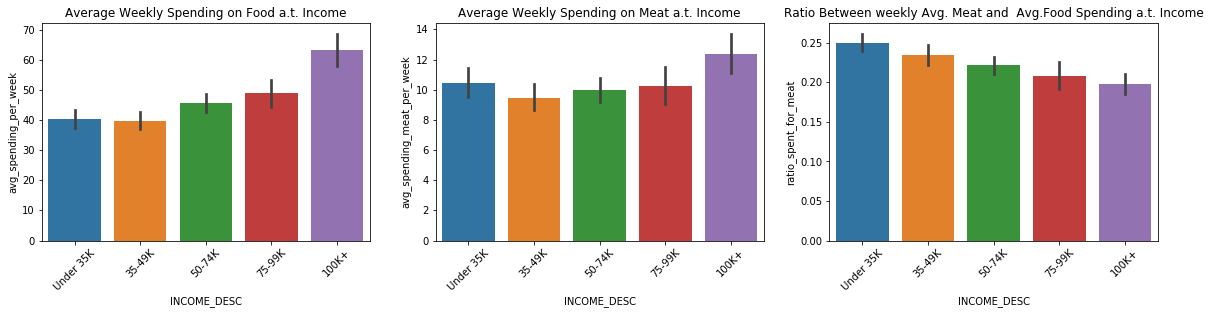

In [106]:
plot_weekly_spending(df_spent_and_demog, 'INCOME_DESC', 'Income', order=["Under 35K", "35-49K", "50-74K", "75-99K", "100K+"])

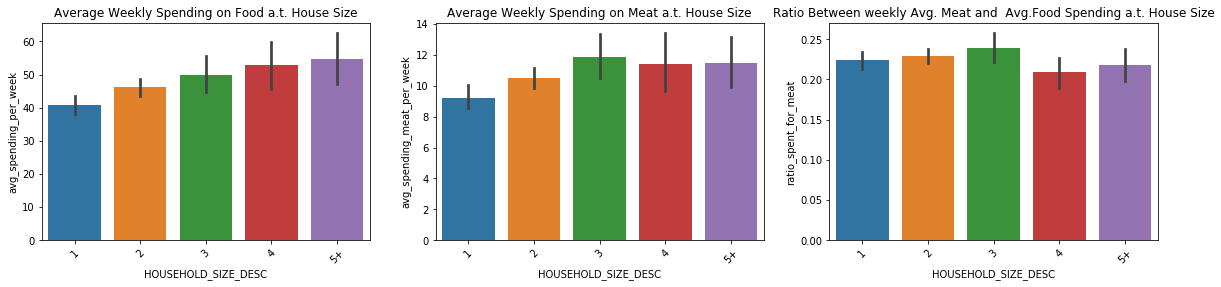

In [107]:
plot_weekly_spending(df_spent_and_demog, 'HOUSEHOLD_SIZE_DESC', 'House Size')

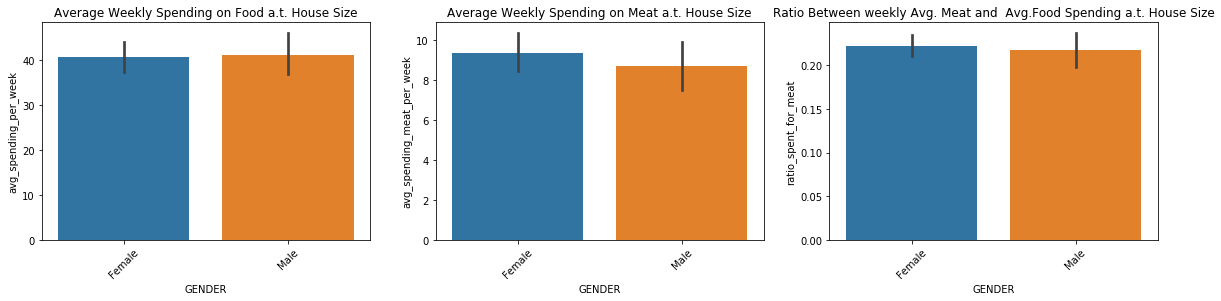

In [108]:
plot_weekly_spending(df_spent_and_demog, 'GENDER', 'House Size')

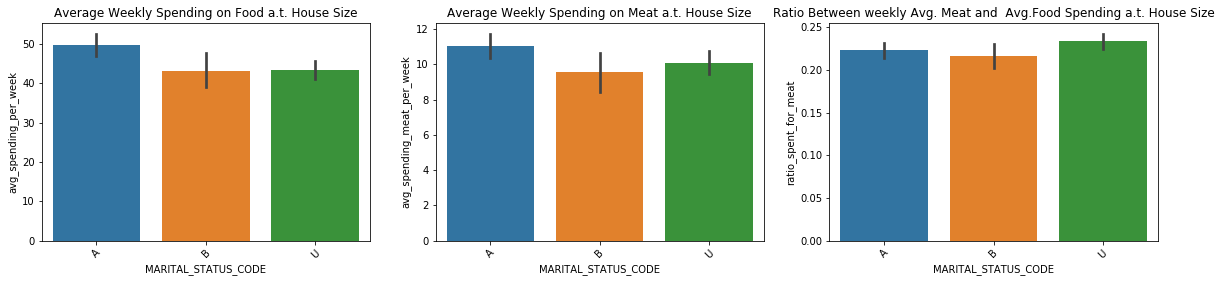

In [109]:
plot_weekly_spending(df_spent_and_demog, 'MARITAL_STATUS_CODE', 'House Size')

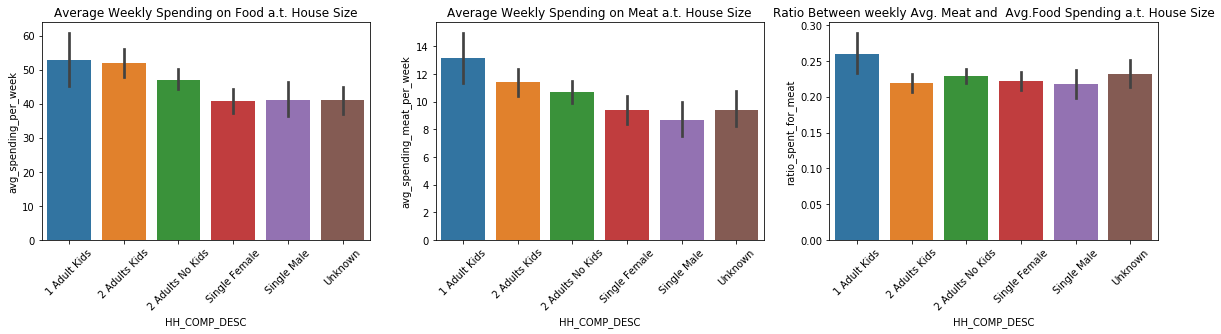

In [110]:
plot_weekly_spending(df_spent_and_demog, 'HH_COMP_DESC', 'House Size')

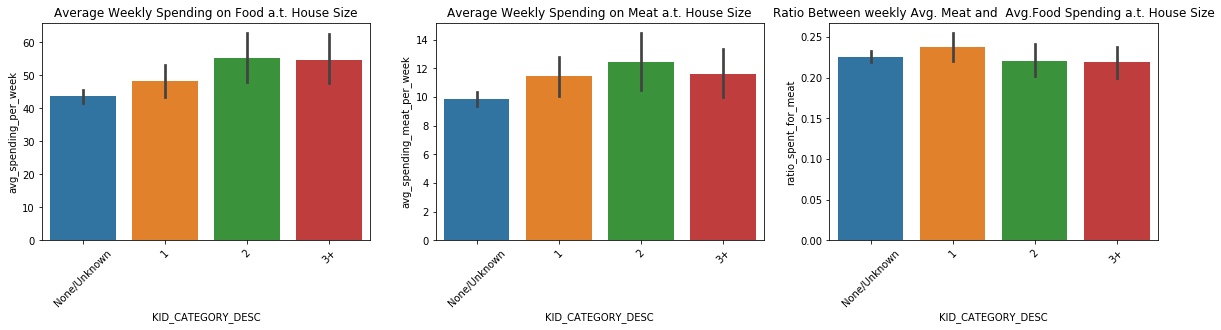

In [111]:
plot_weekly_spending(df_spent_and_demog, 'KID_CATEGORY_DESC', 'House Size')

## Future Work